### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [89]:
data = pd.read_csv('data/coupons.csv')

In [90]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [92]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
#Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [94]:
# There are a lot of missing values in car column- 
#so much so that the data in theat column will not give us any usefull info
#I am dropping the car column
data = data.drop('car', axis=1)


In [95]:
#There are some missing values in Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 ,  Restaurant20To50  columns
#Since this is such a small portion of the total data in the dataset- I am dropping na values
#data = data.fillna()

In [96]:
#Cleaning up Bar column and then turning it into a numeric column
data["Bar"]=data["Bar"].str.replace("never","0")
data["Bar"]=data["Bar"].str.replace("less1","1")
data["Bar"]=data["Bar"].str.replace("1~3","2")
data["Bar"]=data["Bar"].str.replace("4~8","6")
data["Bar"]=data["Bar"].str.replace("gt8","9")
data['Bar'] = pd.to_numeric(data['Bar'])

In [97]:
#Cleaning up CoffeeHouse column and then turning it into a numeric column
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("never","0")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("less1","1")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("1~3","2")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("4~8","6")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("gt8","9")
data['CoffeeHouse'] = pd.to_numeric(data['CoffeeHouse'])

In [123]:
#Cleaning up CarryAway column and then turning it into a numeric column
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("never","0")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("less1","1")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("1~3","2")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("4~8","6")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("gt8","9")
data['RestaurantLessThan20'] = pd.to_numeric(data['RestaurantLessThan20'])

In [99]:
#Cleaning up the Age column
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")
data['age'] = pd.to_numeric(data['age'])

In [100]:
#Cleaning up the Income Column
data["income"]=data["income"].str.replace("$100000 or More","100000")
data["income"]=data["income"].str.replace("Less than $12500","12499")
data["income"]=data["income"].str.replace("$12500 - $24999","18749.50")
data["income"]=data["income"].str.replace("$25000 - $37499","31249.50")
data["income"]=data["income"].str.replace("$37500 - $49999","43749.50")
data["income"]=data["income"].str.replace("$50000 - $62499","56249.50")
data["income"]=data["income"].str.replace("$62500 - $74999","68749.5")
data["income"]=data["income"].str.replace("$75000 - $87499","81249.50")
data["income"]=data["income"].str.replace("$87500 - $99999","93749.50")
data['income'] = pd.to_numeric(data['income'])

4. What proportion of the total observations chose to accept the coupon? 



In [101]:
#proportion = those who said Y / total number of people

prop_y = data.loc[data['Y'] == 1].shape[0]/data.shape[0]
print(prop_y)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

 <span style="color:blue"> 
    Figure 1: Coupon Acceptance Rates By Type
    </span>

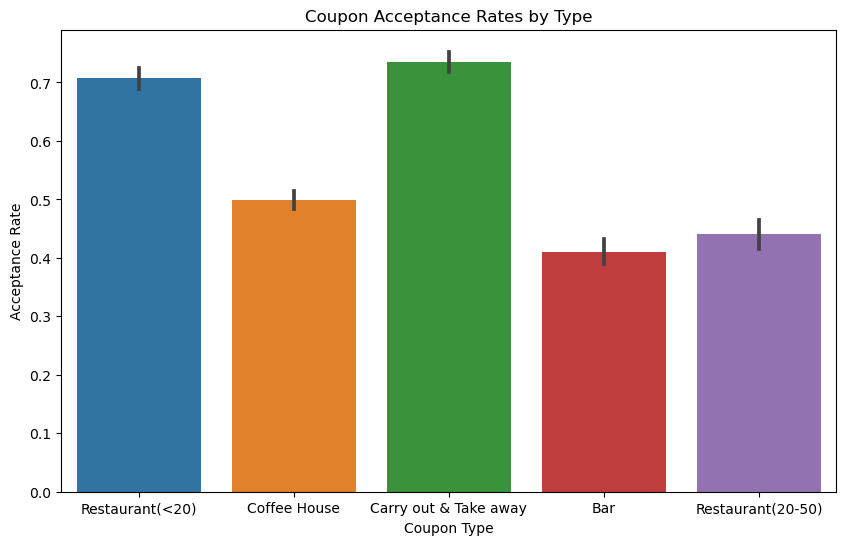

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(data, x="coupon", y= 'Y')
plt.title('Coupon Acceptance Rates by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.savefig('./images/couponacceptance.png')

6. Use a histogram to visualize the temperature column.

 <span style="color:blue"> 
    Figure 2: Temperature
    </span>

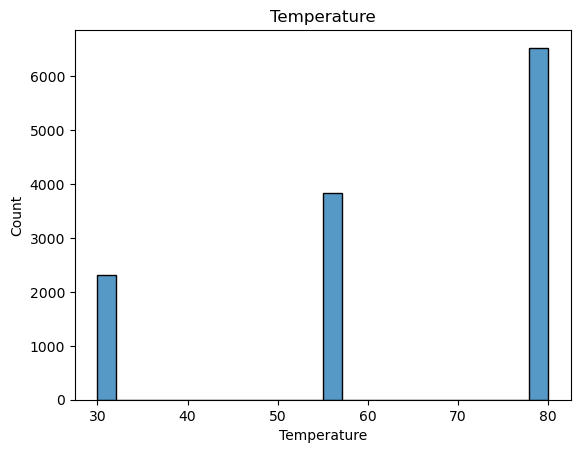

In [103]:
sns.histplot(data, x= 'temperature')
plt.title('Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.savefig('./images/temperature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [124]:
data_bar =data.loc[data['coupon'] == 'Bar']
data_bar = data_bar[data_bar['Bar'].notna()]

In [165]:
data_bar.describe()

,temperature,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1951.000000,1952.000000,1966.0,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000
mean,57.543235,32.502035,0.432859,53439.256867,1.358087,2.465921,4.101999,3.619365,1.0,0.663276,0.254323,0.210580,0.789420,0.412513
std,17.920290,10.484242,0.495598,30118.190475,1.988505,2.776420,2.763192,2.620757,0.0,0.472710,0.435591,0.407824,0.407824,0.492412
min,30.000000,20.000000,0.000000,12499.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,31249.500000,0.000000,1.000000,2.000000,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,31.000000,0.000000,43749.500000,1.000000,1.000000,2.000000,2.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,41.000000,1.000000,81249.500000,2.000000,2.000000,6.000000,6.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,51.000000,1.000000,100000.000000,9.000000,9.000000,9.000000,9.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. What proportion of bar coupons were accepted?


In [166]:
prop_bar_y = data_bar.loc[data_bar['Y'] == 1].shape[0]/data_bar.shape[0]
print("The proportion of accepted bar coupons is:" ,prop_bar_y)

The proportion of accepted bar coupons is: 0.4125127161749746


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [167]:
# Finding the people who go to the bar 3 times or fewer
acc_bar3 = (data_bar.loc[(data_bar['Bar']<= 3) & (data_bar['Y'] == 1)].shape[0]/data_bar.loc[(data_bar['Bar']<= 3)].shape[0]) *100
print("The acceptance rate between those who went to a bar 3 or fewer times a month is :",acc_bar3)

The acceptance rate between those who went to a bar 3 or fewer times a month is : 37.34463276836158


In [168]:
#Finding the people who go to the bar more than 3 times
acc_bar_3_more = (data_bar.loc[(data_bar['Bar'] > 3) & (data_bar['Y'] == 1)].shape[0]/data_bar.loc[(data_bar['Bar'] > 3)].shape[0])*100
print("The acceptance rate between those who went to the bar more than 3 times a month is:",acc_bar_3_more)

The acceptance rate between those who went to the bar more than 3 times a month is: 76.53061224489795


#### Conclusion: 
People who go to the bar less than 3 times a month are more likely to accept the coupon than those who went more.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [169]:
data_bar_25 = data_bar.loc[(data_bar['Bar'] > 1) & (data_bar['age'] > 25)]
accept_bar_25 = data_bar_25.loc[data_bar_25['Y'] == 1].shape[0] / data_bar_25.shape[0] *100
print("The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is :",accept_bar_25 )

The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is : 69.32367149758454


In [170]:
# Acceptance rate of those who are either under the age of 25 or go to the bar less than 1 time per month
data_bar_25_under = data_bar.loc[(data_bar['Bar'] <= 1) | (data_bar['age'] <= 25)]
accept_bar_25_under = data_bar_25_under.loc[data_bar_25_under['Y'] == 1].shape[0] / data_bar_25_under.shape[0] *100
print("The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is :",accept_bar_25_under )

The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is : 33.76288659793815


##### Conclusion: 
Drivers that go to the bar once a month and are over the age of 25 are more likely to accept the Bar coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [171]:
total_fish = data_bar.loc[(data_bar['Bar'] > 1) & (data_bar['passanger'] != 'Kid(s)') &
                          (data_bar['occupation'] != 'Farming Fishing & Forestry')]
total_fish_accept = total_fish.loc[total_fish['Y']== 1].shape[0]/total_fish.shape[0] *100
print("The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming fishing or forestry is:",total_fish_accept )

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming fishing or forestry is: 71.06227106227107


In [121]:
total_not_fish = data_bar.loc[(data_bar['Bar'] < 1) | (data_bar['passanger'] == 'Kid(s)') | 
                              (data_bar['occupation'] == 'Farming Fishing & Forestry')]
total_not_fish_accpet = total_not_fish.loc[total_not_fish['Y']== 1].shape[0]/total_not_fish.shape[0] *100
print("The acceptance rate between drivers who go to bars less than once a month or had passengers that were a kid or had occupations in farming fishing or forestry is:",total_not_fish_accpet )

The acceptance rate between drivers who go to bars less than once a month or had passengers that were a kid or had occupations in farming fishing or forestry is: 20.192307692307693


#### Conclusion: 
The drivers that go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are more likely to accept the coupon.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [129]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed 
group_1 = data_bar.loc[(data_bar['Bar'] > 1) & (data_bar['passanger'] != 'Kid(s)') & 
                       (data_bar['maritalStatus'] != 'Widowed')]
group_1.loc[(group_1['Y']==1)].shape[0]/group_1.shape[0] *100

37.77777777777778

In [126]:
# go to bars more than once a month and are under the age of 30 OR
group_2 = data_bar.loc[(data_bar['Bar'] > 1) & (data_bar['age'] < 30)]
group_2.loc[(group_2['Y']==1)].shape[0]/group_2.shape[0] *100

72.17391304347827

In [131]:
# go to cheap restaurants more than 4 times a month and income is less than 50K.
group_3 = data_bar.loc[(data_bar['RestaurantLessThan20'] > 4) & (data_bar['income'] < 50000)]
group_3.loc[(group_3['Y']==1)].shape[0]/group_3.shape[0] *100

45.72271386430678

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Hypothesis based on my Observations: 
Characteristics of Drivers that are more likely to accept:
1. Go to the bar at least once a week
2. Over the age of 25
3. Have occupations not in Farming, Forestry or Fishing

Characteristics of Drivers are are less likely to accept:
1. Drivers that typically go to cheaper restaurants.
2. If their passenger is a child

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Background

This analysis was done in the perspective of the company that sends out coupons to driver's phones for different businesses around the city. They recently got complaints from Coffee Houses because the acceptance rate of their coupons is around 49%. The Coffee House owners are comparing their acceptance rates to the higher acceptance rates of Restaurants Under $20 and Carry Away because they are at a similar price point. Reference Figure 1. They want an analysis done on the types of customers that typically accept Coffee House coupons and target those drivers specifically.


## Business Goals and KPI
1. Get a better understanding of which customers are likely to accept a Coffee House coupon
2. Increase the acceptance rate of Coffee House coupons by targeting drivers that are more likely to accept

## Gathering and Describing Data
A Dataframe of just Coffee House coupons was created to start our analysis. The dataset consists of 3996 responses with the average age of 32 and income of $52179. The average driver who responded goes to the Coffee House about 2.4 times a week.  Also, using this dataset we were able to confirm that the proportion of people who accepted a coffee house coupon was under 50%.

In [192]:
#Dataframe of just the CoffeeHouse Coupons
data_coffee = data.loc[data['coupon'] == 'Coffee House']

In [189]:
data_coffee.describe()

,temperature,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,3996.000000,3996.000000,3996.000000,3996.000000,3959.000000,3924.000000,3939.000000,3946.000000,3996.0,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,68.031782,32.178679,0.387888,52179.833584,1.474867,2.412080,4.056106,3.724278,1.0,0.518769,0.077578,0.187688,0.812312,0.499249
std,15.984543,10.406367,0.487330,29363.534180,2.131790,2.741412,2.728375,2.683282,0.0,0.499710,0.267539,0.390511,0.390511,0.500062
min,30.000000,20.000000,0.000000,12499.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,31249.500000,0.000000,1.000000,2.000000,2.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,31.000000,0.000000,43749.500000,1.000000,1.000000,2.000000,2.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,41.000000,1.000000,81249.500000,2.000000,2.000000,6.000000,6.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,51.000000,1.000000,100000.000000,9.000000,9.000000,9.000000,9.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
#What proportion of people accept a CoffeHouse Coupon
coffee_accept = data_coffee.loc[data_coffee['Y']==1].shape[0]/data_coffee.shape[0]
print("The proportion of people who accept a coffee house coupon is:", coffee_accept)

The proportion of people who accept a coffee house coupon is: 0.49924924924924924


##  Data Cleansing
The data cleaning that has been done to this dataset is:
1. Car column has been dropped since majority of the values in that column are null and the remaining do not offer any valuable insites
2. The Age column has been cleaned by changing the 'below21' value to 20 and the '50plus' value to 51. It was then converted to a numeric column
3. The Income column has been cleaned by changing the values that are given as a range to the average value of that range. The "less than 12500 ' value was changed to 12499. And the '100000 or More' value was changed to 100000. Dollar signs and commas were removed prior to converting it to a numeric column
4. The CoffeeHouse column was converted to a numberic column also by taking the averages of the ranges and changing 'less1' and 'never' to 0 

## Exploratory Data Analysis

* **Looking at the impact of Marital Status, whether or not they have Children and Income is on Coupon Acceptance**

 <span style="color:blue"> 
    Figure 3: HeatMap showing the relationship between marital status, children and income on acceptance rate
    </span>

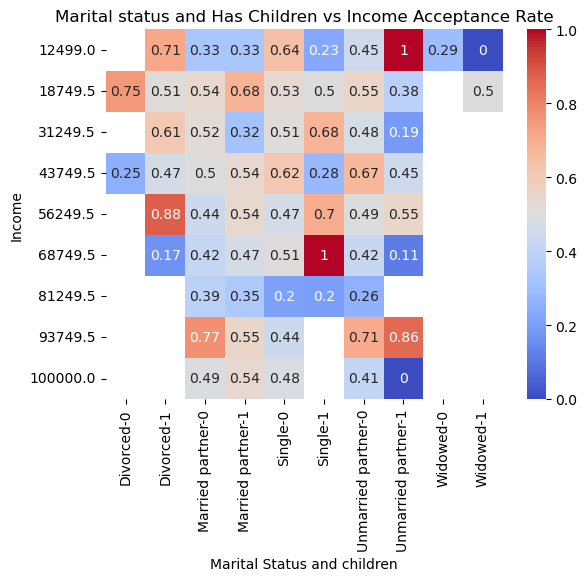

In [152]:
#Heat map to visualize age and Marital Status/Has Children for Acceptance of Coffee Coupons
fig2= data_coffee.pivot_table(index='income', columns=['maritalStatus', 'has_children'], values='Y', aggfunc='mean')
sns.heatmap(fig2, cmap='coolwarm', annot=True)
plt.xlabel("Marital Status and children")
plt.ylabel("Income")
plt.title("Marital status and Has Children vs Income Acceptance Rate")
plt.savefig('./images/maritalstatus_children_heatmap.png')

 <span style="color:blue"> 
    Figure 4: Bar plot showing the relationship between marital status  on acceptance rate
    </span>

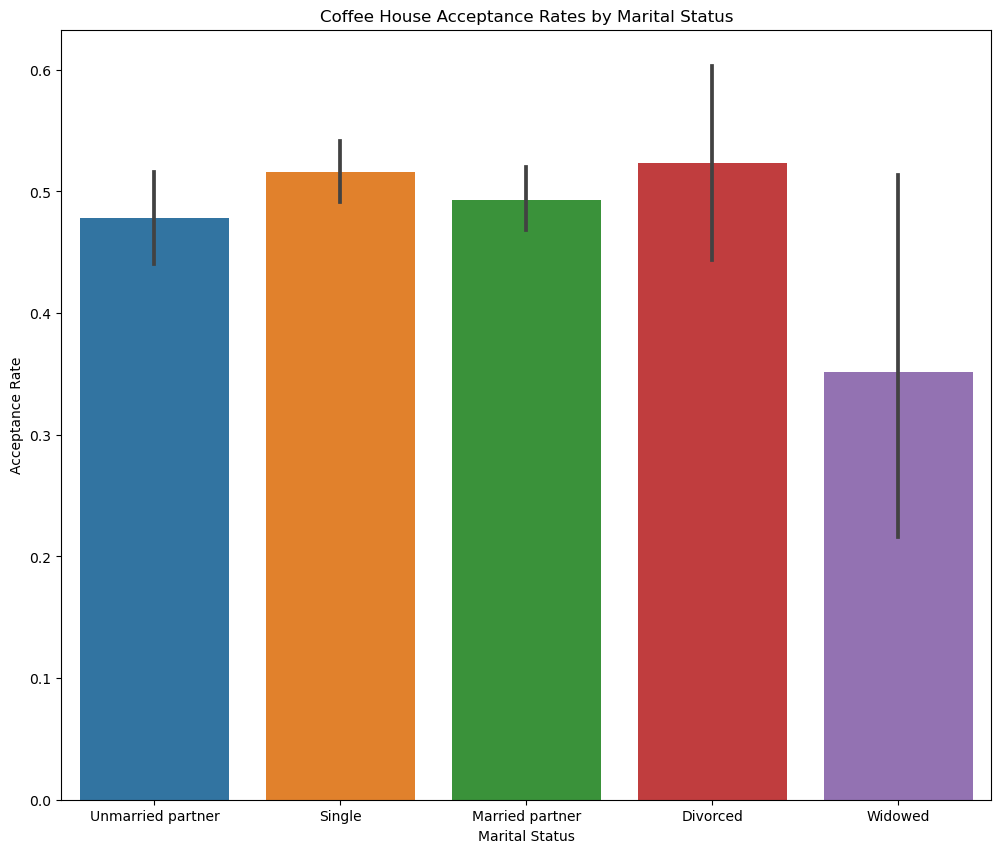

In [185]:
plt.figure(figsize=(12, 10))
sns.barplot(data_coffee, x='maritalStatus', y= 'Y')
plt.title('Coffee House Acceptance Rates by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')
plt.savefig('./images/couponmarital.png')

### Conclusions of Heatmap for Marital Status and Children vs Income and Acceptance Rate by Marital Status:
1. Initially we can see that there are many values missing- there are not that much data for Widowed and Divorced drivers. This might be due to not having many customers who fit that criteria, or those that do fit did not respond to the survey. It appears that Widowed drivers are less likely to accept while Divorced are more likely to accept
2. The acceptance rate of Unmarried partner with one child is very high for the 93749 and 12499 income levels. But lower for other incomes
3. A divorced driver is more likely to go to the coffee house if they also have children
4. Overall, drivers are more likely to go to the coffee shop if they have children


* **Looking at the impact of Education, Age and Gender on Coupon Acceptance**

 <span style="color:blue"> 
    Figure 5: Bar Plot to visualize Acceptance Rate vs Educaton 
    </span>

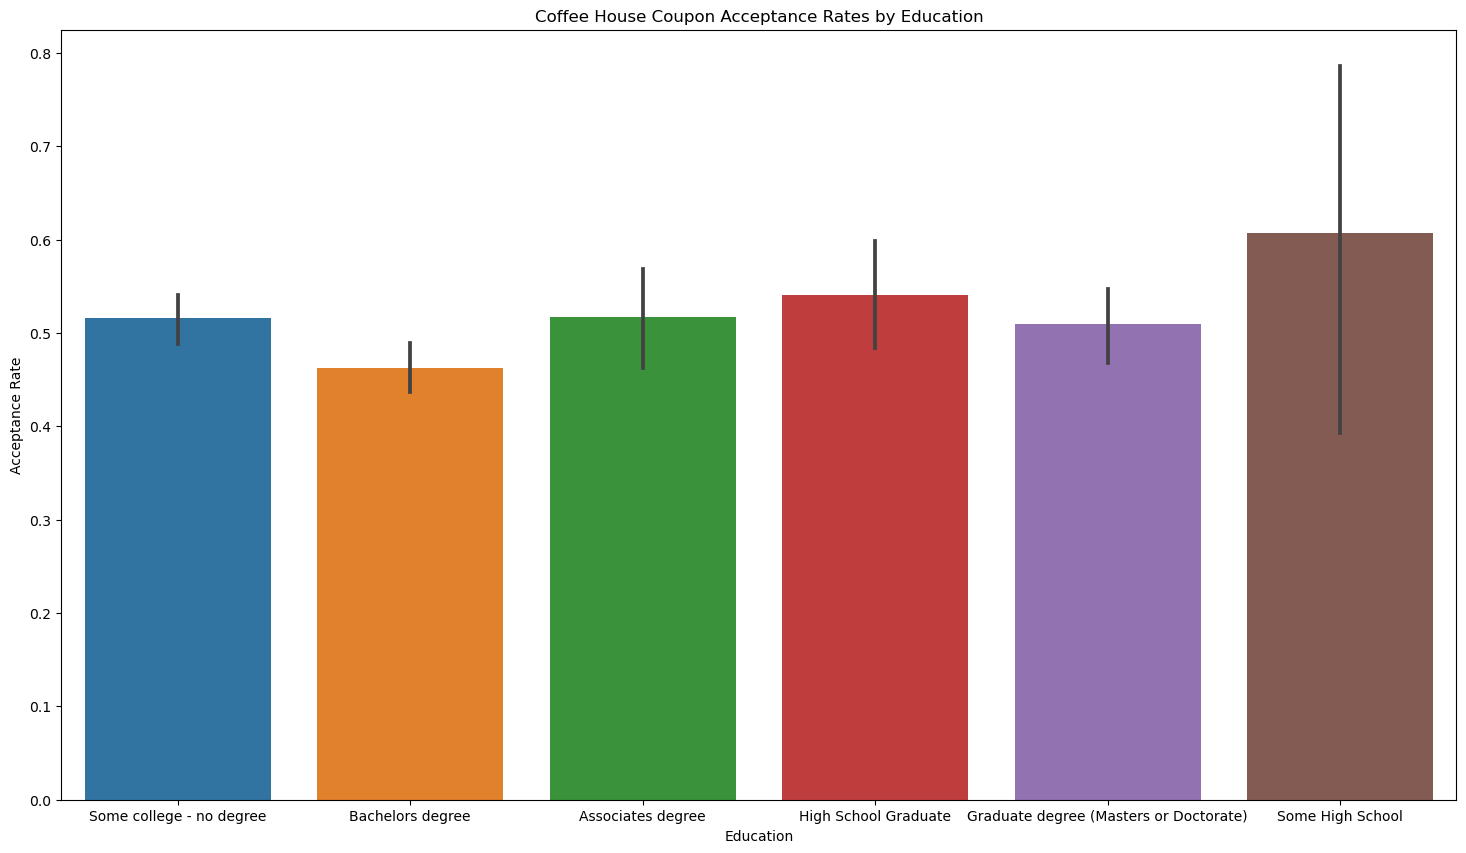

In [181]:
plt.figure(figsize=(18, 10))
sns.barplot(data_coffee, x='education', y= 'Y')
plt.title('Coffee House Coupon Acceptance Rates by Education')
plt.xlabel('Education')
plt.ylabel('Acceptance Rate')
plt.savefig('./images/couponacceptanceEducation.png')

 <span style="color:blue"> 
    Figure 6: Heat map to visualize the relationship between age, gender and Education on Coffee House coupon Acceptance
    </span>

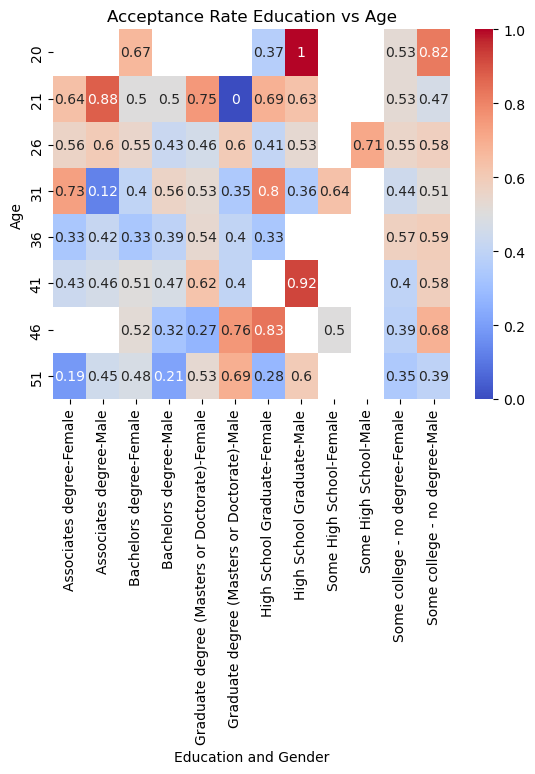

In [182]:

fig2= data_coffee.pivot_table(index='age', columns=['education','gender'], values='Y', aggfunc='mean')
sns.heatmap(fig2, cmap='coolwarm', annot=True)
plt.xlabel("Education and Gender")
plt.ylabel("Age")
plt.title("Acceptance Rate Education vs Age")
plt.savefig('./images/education_age_heatmap.png')

### Conclusions from Age vs Education and Gender Heatmap and Education vs Acceptance Bar Graphs:
It looks like age and education have a large impact on whether someone accepts a coupon.
1. Female drivers with Associates degrees who are 21 are more likely to accept a coffee house coupn
2. High school graduate males have always accepted
3. Those with Some College - no degree as less likely to accept as they get older
4. Male Drivers with Graduate Degrees are more likely to accept than Female Drivers with Graduate Degrees.
5. Drivers who are 20 or 21 are more likely to accept overall
6. Looking at the Bar plot it appears that those with Some High School are more likely to accept but I am not able to draw that conclusion definitely because there needs to be some more data

* **Looking at the impact of Desitnation Coupon Acceptance**

 <span style="color:blue"> 
    Figure 7: Bar Plot visualizing how likely Drivers will accept based on their destination
    </span>

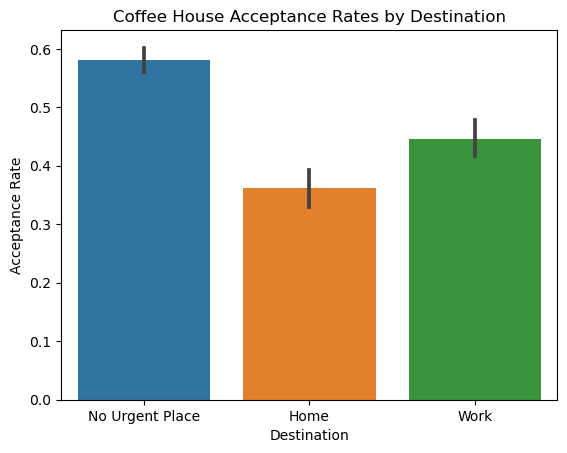

In [194]:

sns.barplot(data_coffee, x='destination', y= 'Y')
plt.title('Coffee House Acceptance Rates by Destination')
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate')
plt.savefig('./images/couponDestination.png')

### Conclusions from Destination vs Acceptance Bar Graph:

People are less likely to accept if they are headed home and more likely to accept if they do not have an urgent place to be or are headed to work

* **Looking at the impact of Weather, Direction and Passenger on Coupon Acceptance**

 <span style="color:blue"> 
    Figure 8: Bar Plot to visualize Acceptance Rates based on Weather and Direction they are travelling
    </span>

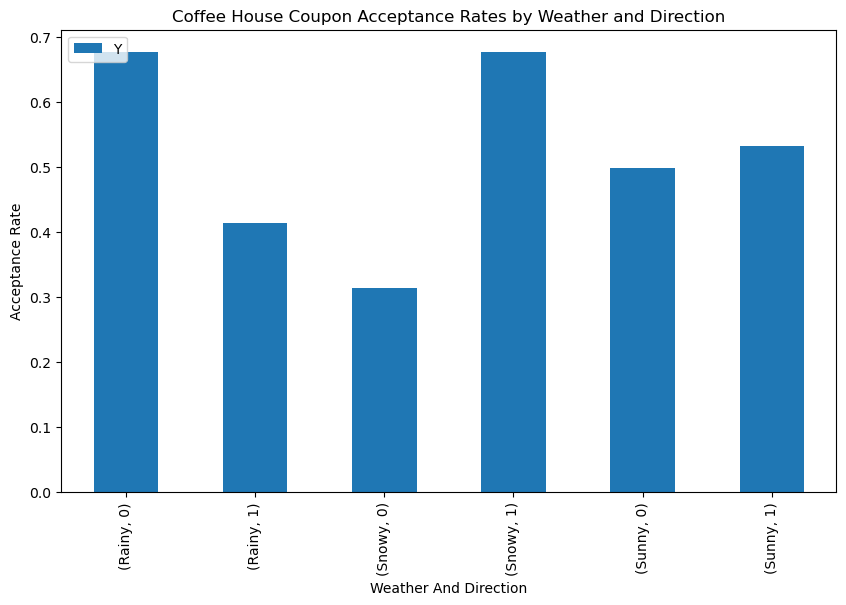

In [184]:
df_groups = data_coffee.groupby(['weather' ,'direction_same'])['Y'].mean()
plt.figure(figsize=(10, 6))
df_groups.plot(kind='bar')
plt.legend(loc="upper left")
plt.title('Coffee House Coupon Acceptance Rates by Weather and Direction')
plt.xlabel('Weather And Direction')
plt.ylabel('Acceptance Rate')
plt.savefig('./images/coffeeacceptanceWeather.png')

 <span style="color:blue"> 
    Figure 9: Bar Plot to visualize Acceptance Rates based on Passenger Type
    </span>

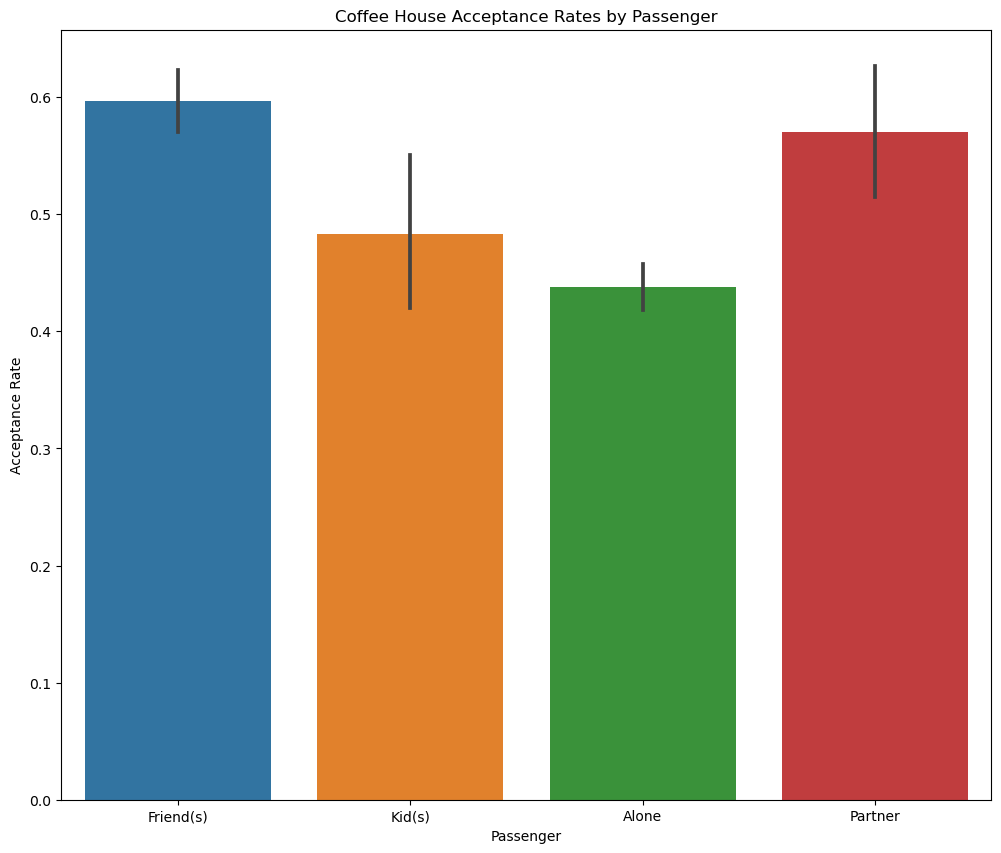

In [186]:
plt.figure(figsize=(12, 10))
sns.barplot(data_coffee, x='passanger', y= 'Y')
plt.title('Coffee House Acceptance Rates by Passenger')
plt.xlabel('Passenger')
plt.ylabel('Acceptance Rate')
plt.savefig('./images/couponpassenger.png')

 <span style="color:blue"> 
    Figure 10: Heat map to visualize the relationship between Passenger, Weather and Destination on Coffee House coupon Acceptance
    </span>

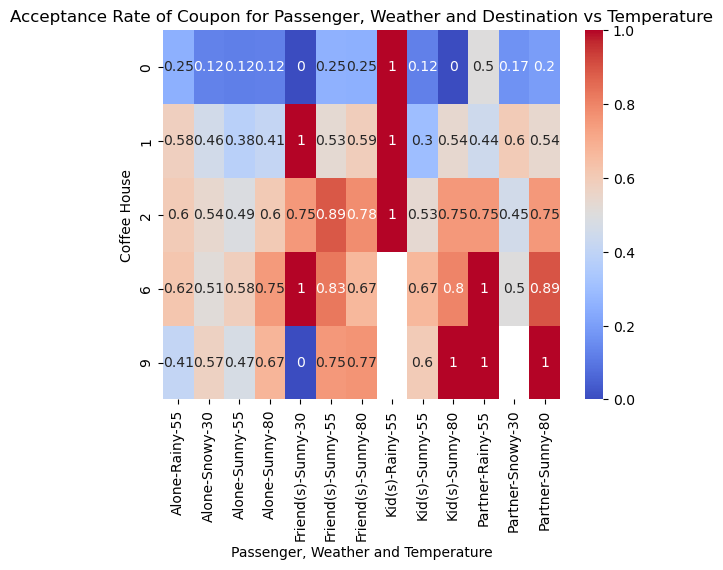

In [30]:
#Heat map to visualize the relationship between Passenger, Weather and Destination on Coffee House coupon Acceptance
fig2= data_coffee.pivot_table(index='CoffeeHouse', columns=['passanger','weather','temperature'], values='Y', aggfunc='mean')
sns.heatmap(fig2, cmap='coolwarm', annot=True)
plt.xlabel("Passenger, Weather and Temperature")
plt.ylabel("Coffee House")
plt.title("Acceptance Rate of Coupon for Passenger, Weather and Destination vs Temperature")
plt.savefig('./images/passenger_weather_dest_heatmap.png')

### Conclusions from Number of Coffee House Visits vs Passenger, Weather and Temperature Heatmap:
This Heat Map is very fascinating because there are many instances where everyone who fits that criteria have accepted. 
1. If someone goes to the cofee shop 2 or more times per week and they are with their partner, they have a very high liklyhood of accepting. Unless it is snowing!
2. People generally are unwilling to accept a coffee house coupon if it is snowing.
3. If the business is interested in targeting customers that go to the coffee house 2 or less times per week- they should reach out to those traveling with children when it is Rainy and 55 degrees,
4. Those who go to the coffee house2 or more times per week are overall more likely to accept a coupon

* **Looking at the impact of Age and Coffee House Attendence on Coupon Acceptance**

 <span style="color:blue"> 
    Figure 11: Bar Graph looking at the Acceptance rate of Coffee House coupon by Age    </span>

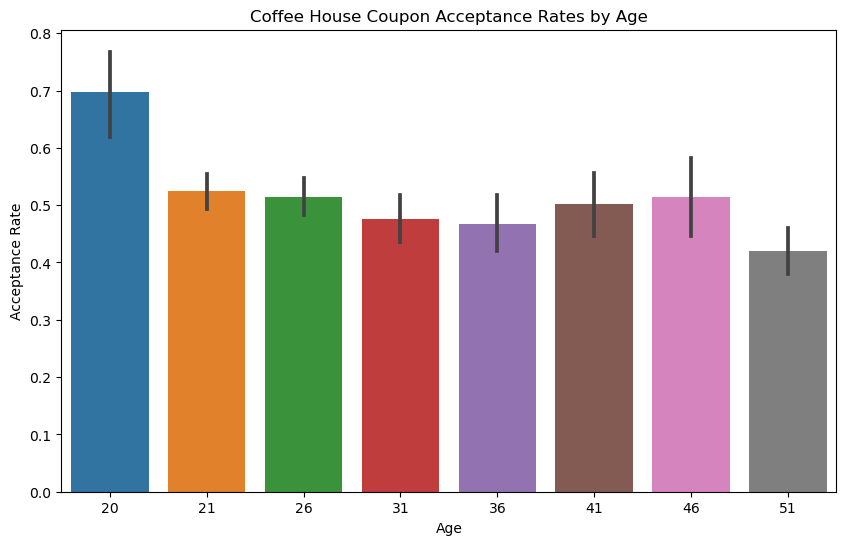

In [177]:
plt.figure(figsize=(10, 6))
sns.barplot(data_coffee, x='age', y= 'Y')
plt.title('Coffee House Coupon Acceptance Rates by Age')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.savefig('./images/coffeeacceptanceAge.png')

 <span style="color:blue"> 
    Figure 12: Heat map to visualize the relationship between Age and Coffee House Attendence on Coffee House coupon Acceptance
    </span>

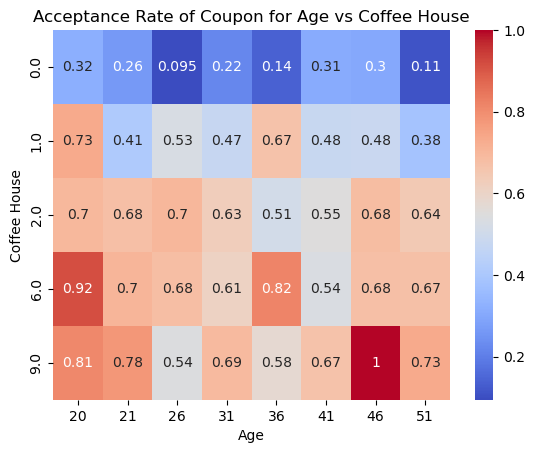

In [191]:
#Heat map to visualize the relationship between  how many times they attend a coffee house a week vs Age on Coffee House coupon Acceptance
fig2= data_coffee.pivot_table(index='CoffeeHouse', columns=['age'], values='Y', aggfunc='mean')
sns.heatmap(fig2, cmap='coolwarm', annot=True)
plt.xlabel("Age")
plt.ylabel("Coffee House")
plt.title("Acceptance Rate of Coupon for Age vs Coffee House")
plt.savefig('./images/couponacceptanceage_coffee_heatmap.png')

### Conclusions from Acceptance Rate by Age Bar Graph and  Number of Coffee House Visits vs Age Heatmap:
This heat map again confirms that people wo are typically going to the coffee house multipole times a week already are more likely to accept.
1. It might make sense to not even send coupons to customers who say that they attend the coffee house less than one time per week because they are so unlikely to accept
2. Looking at the bar graph, while younger drivers are more likely to accept a coupon, I do not think we should exclude those who attend the coffee house more than 2 times a week by age because there are many older drivers who have a high acceptance 


## Overall Conclusions 
The criteria that is most likely to impact is:
1. Drivers are less likely to accept if it is snowing.
2. Drivers are more likely to accept if they go to the coffee house more than 3 times a week.
3. Drivers who have an income under 60000 are more likely to accept a coffee house coupon.

If we only send the coupon to people who fit the above criteria we find that we have an acceptance rate of 71%.


In [187]:
coffe_criteria = data_coffee.loc[ (data_coffee['income']< 60000) & 
                         (data_coffee['education']!= 'Graduate degree (Masters or Doctorate)') 
                                 & (data_coffee['CoffeeHouse']> 3)
                            & (data_coffee['weather'] != 'Snowy')]
coffe_criteria.loc[coffe_criteria['Y']==1].shape[0]/coffe_criteria.shape[0]*100

71.15384615384616

## Next Steps
1. There are a lot of categories where there is missing data or there are such few records that the results are not meaningful. For example, we do no thave very many drivers that are in the widowed category.
2. We need to do some modeling to see if the inferences that were made through data analysis is correct.